# Module 4–Supervised Learning -1

In [3]:
# Import libraries necessary for this project
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import cross_val_score
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn import tree
from sklearn import preprocessing

### Case Study I

In [4]:
voice = pd.read_csv('voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
from sklearn import preprocessing
#label_ohe = OneHotEncoder()
#y = label_ohe.fit_transform(voice1.label)
le = preprocessing.LabelEncoder()
voice['label'] = le.fit_transform(voice['label'])
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [6]:
prediction_var = voice.columns
prediction_var = prediction_var.drop("label")
print(prediction_var)
#voice.isnull()
#im = Imputer(missing_values=0, strategy="mean", axis=0)
#voice_array = im.fit_transform(voice)
#voice = pd.DataFrame(voice_array, columns=prediction_var)
#print(voice.head())

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')


In [7]:
train1, test1 = train_test_split(voice, test_size = 0.2)# in this our main data is splitted into train and test
# we can check their dimension
print(train1.shape)
print(test1.shape)
train_X = train1[prediction_var]# taking the training data input
train_y=train1['label']# This is output of our training data
# same we have to do for test
test_X= test1[prediction_var] # taking test data inputs
test_y =test1['label']   #output value of test dat

(2534, 21)
(634, 21)


In [8]:
#Logistic Regression
logistic = LogisticRegression()
logistic.fit(train_X,train_y)
temp=logistic.predict(test_X)
print(metrics.accuracy_score(temp,test_y)) # to check the accuracy

0.9085173501577287


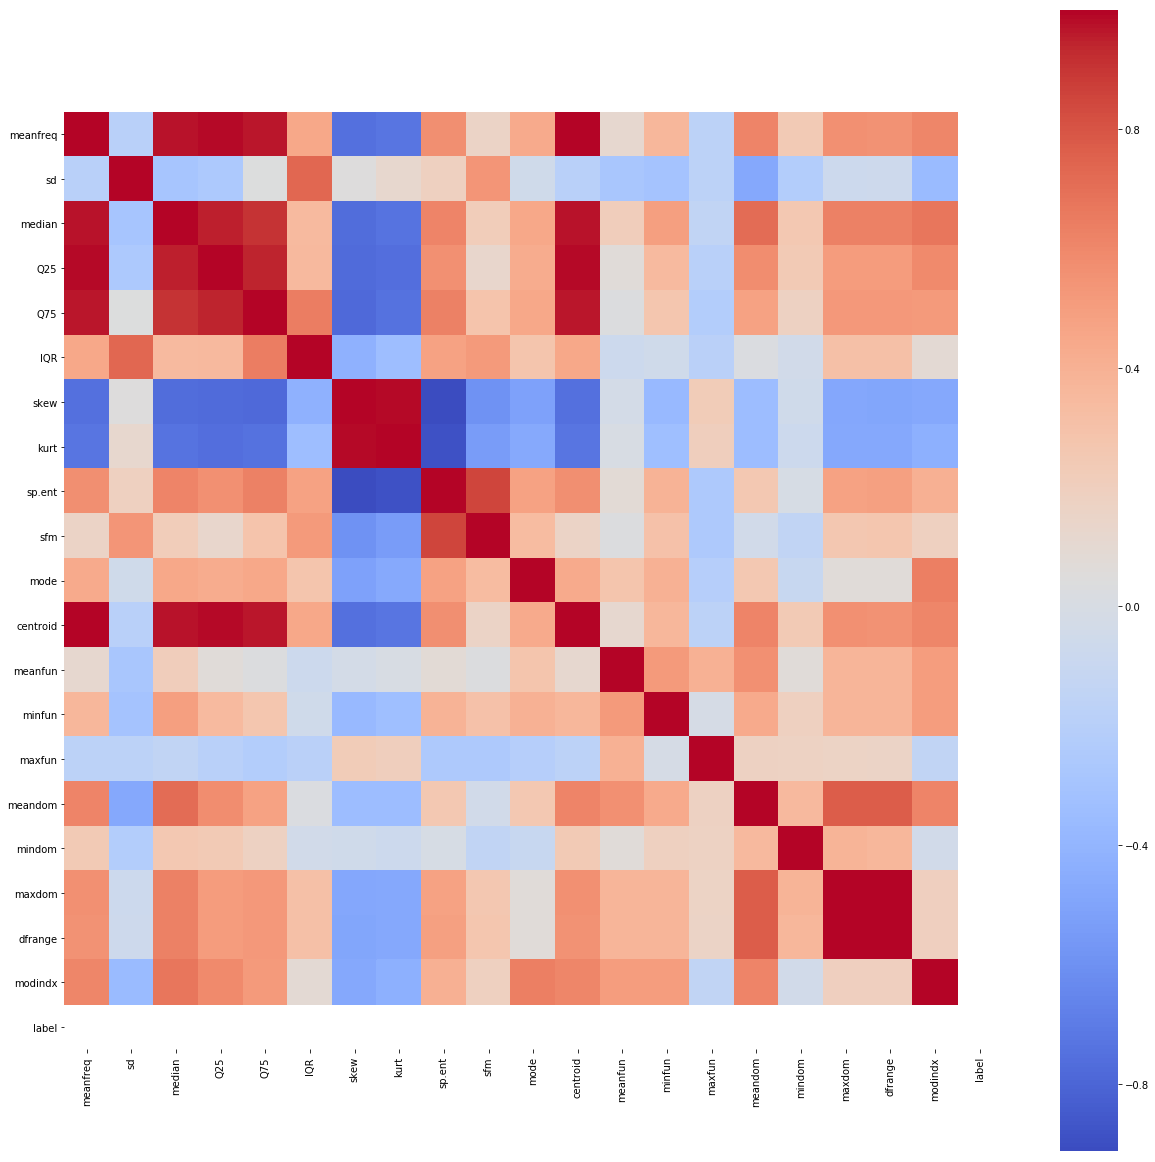

In [9]:
corr = voice[:20].corr() # .corr is used for find corelation
plt.figure(figsize=(21,21))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

In [10]:
prediction_var = prediction_var.drop('kurt')
prediction_var = prediction_var.drop('dfrange')
prediction_var = prediction_var.drop('Q25')
prediction_var = prediction_var.drop('Q75')
prediction_var = prediction_var.drop('median')
prediction_var = prediction_var.drop('centroid')
prediction_var = prediction_var.drop('sp.ent')
print(prediction_var)

Index(['meanfreq', 'sd', 'IQR', 'skew', 'sfm', 'mode', 'meanfun', 'minfun',
       'maxfun', 'meandom', 'mindom', 'maxdom', 'modindx'],
      dtype='object')


In [11]:
train2_X = train1[prediction_var]# taking the training data input
train2_y=train1['label']# This is output of our training data
# same we have to do for test
test2_X= test1[prediction_var] # taking test data inputs
test2_y =test1['label']   #output value of test dat

In [12]:
#Logistic Regression
logistic = LogisticRegression()
logistic.fit(train2_X,train2_y)
temp=logistic.predict(test2_X)
print(metrics.accuracy_score(temp,test2_y)) # to check the accuracy

0.9022082018927445


### Case Study II

In [13]:
horse = pd.read_csv('horse.csv')
print(horse.head())
horse.info()

  surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

    ...    packed_cell_volume total_protein abdomo_appearance abdomo

In [14]:
horse[horse.isnull().any(axis=1)].head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [15]:
horse.surgery.unique()

array(['no', 'yes'], dtype=object)

In [16]:
horse.pain.unique()

array(['extreme_pain', 'mild_pain', 'depressed', nan, 'severe_pain',
       'alert'], dtype=object)

In [17]:
#horse = horse.fillna(' ')
#horse = horse.replace(np.nan, '', regex=True)
#from scipy import stats
#stats.mode(horse['temp_of_extremities'])

In [18]:
col_names = horse.select_dtypes(include=['object']).columns
print(col_names)

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome',
       'surgical_lesion', 'cp_data'],
      dtype='object')


In [19]:
from collections import Counter
for col in col_names:
    print("%s %s"%(col, Counter(horse[col]).most_common()))

surgery [('yes', 180), ('no', 119)]
age [('adult', 275), ('young', 24)]
temp_of_extremities [('cool', 108), ('normal', 78), (nan, 56), ('warm', 30), ('cold', 27)]
peripheral_pulse [('normal', 114), ('reduced', 103), (nan, 69), ('absent', 8), ('increased', 5)]
mucous_membrane [('normal_pink', 79), ('pale_pink', 57), (nan, 47), ('pale_cyanotic', 41), ('bright_pink', 30), ('bright_red', 25), ('dark_cyanotic', 20)]
capillary_refill_time [('less_3_sec', 187), ('more_3_sec', 78), (nan, 32), ('3', 2)]
pain [('mild_pain', 67), ('depressed', 59), (nan, 55), ('extreme_pain', 42), ('severe_pain', 38), ('alert', 38)]
peristalsis [('hypomotile', 127), ('absent', 73), (nan, 44), ('hypermotile', 39), ('normal', 16)]
abdominal_distention [('none', 75), ('slight', 65), ('moderate', 65), (nan, 56), ('severe', 38)]
nasogastric_tube [(nan, 104), ('slight', 101), ('none', 71), ('significant', 23)]
nasogastric_reflux [('none', 119), (nan, 106), ('more_1_liter', 39), ('less_1_liter', 35)]
rectal_exam_feces [

In [20]:
horse.isnull().any()

surgery                  False
age                      False
hospital_number          False
rectal_temp               True
pulse                     True
respiratory_rate          True
temp_of_extremities       True
peripheral_pulse          True
mucous_membrane           True
capillary_refill_time     True
pain                      True
peristalsis               True
abdominal_distention      True
nasogastric_tube          True
nasogastric_reflux        True
nasogastric_reflux_ph     True
rectal_exam_feces         True
abdomen                   True
packed_cell_volume        True
total_protein             True
abdomo_appearance         True
abdomo_protein            True
outcome                  False
surgical_lesion          False
lesion_1                 False
lesion_2                 False
lesion_3                 False
cp_data                  False
dtype: bool

In [21]:
horse['temp_of_extremities'] = horse['temp_of_extremities'].fillna('cool')
horse['peripheral_pulse'] = horse['peripheral_pulse'].fillna('normal')
horse['mucous_membrane'] = horse['mucous_membrane'].fillna('normal_pink')
horse['capillary_refill_time'] = horse['capillary_refill_time'].fillna('less_3_sec')
horse['pain'] = horse['pain'].fillna('mild_pain')
horse['peristalsis'] = horse['peristalsis'].fillna('hypomotile')
horse['abdominal_distention'] = horse['abdominal_distention'].fillna('none')
horse['nasogastric_tube'] = horse['nasogastric_tube'].fillna('slight')
horse['nasogastric_reflux'] = horse['nasogastric_reflux'].fillna('none')
horse['rectal_exam_feces'] = horse['rectal_exam_feces'].fillna('absent')
horse['abdomen'] = horse['abdomen'].fillna('distend_large')
horse['abdomo_appearance'] = horse['abdomo_appearance'].fillna('cloudy')
horse['abdomo_protein'] = horse['abdomo_protein'].fillna(3.04)
horse['rectal_temp'] = horse['rectal_temp'].fillna(horse['rectal_temp'].mean())
horse['pulse'] = horse['pulse'].fillna(horse['pulse'].mean())
horse['respiratory_rate'] = horse['respiratory_rate'].fillna(horse['respiratory_rate'].mean())
horse['nasogastric_reflux_ph'] = horse['nasogastric_reflux_ph'].fillna(horse['nasogastric_reflux_ph'].mean())
horse['packed_cell_volume'] = horse['packed_cell_volume'].fillna(horse['packed_cell_volume'].mean())
horse['total_protein'] = horse['total_protein'].fillna(horse['total_protein'].mean())

In [22]:
le2 = preprocessing.LabelEncoder()
for col in col_names:
    horse[col] = le2.fit_transform(horse[col])

In [23]:
#horse.surgery = pd.Categorical(horse.surgery)
#horse['surgery'] = horse.surgery.cat.codes

In [24]:
prediction_var = horse.columns
predictin_var = prediction_var.drop('outcome')

In [26]:
train2, test2 = train_test_split(horse, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train2.shape)
print(test2.shape)
train_X = train2[prediction_var]# taking the training data input
train_y= train2['outcome']# This is output of our training data
test_X = test2[prediction_var]# taking the training data input
test_y= test2['outcome']# This is output of our training data

(209, 28)
(90, 28)


In [27]:
#Decision Tree classifier
model = tree.DecisionTreeClassifier()
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)
df=pd.DataFrame(prediction,test_y)
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy

1.0


In [28]:
#RandomForest classifier
model=RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data
#prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy

0.9333333333333333


##### Case Study III

In [29]:
loan = pd.read_csv('loan_borowwer_data.csv')
print(loan.head())
loan.info()

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

In [30]:
loan.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [31]:
my_dict = {'debt_consolidation':0,
           'credit_card':1,
           'all_other':2,
           'home_improvement':3,
           'small_business':4,
           'major_purchase':5,
           'educational':6
          }
loan['purpose'] = loan['purpose'].map(my_dict)

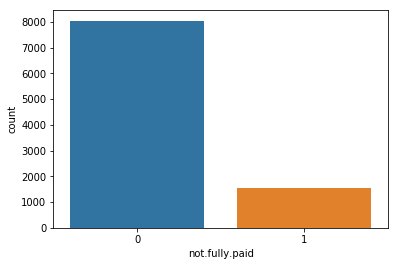

In [32]:
sns.countplot(loan['not.fully.paid'],label="Count")
plt.show()
#loan.columns

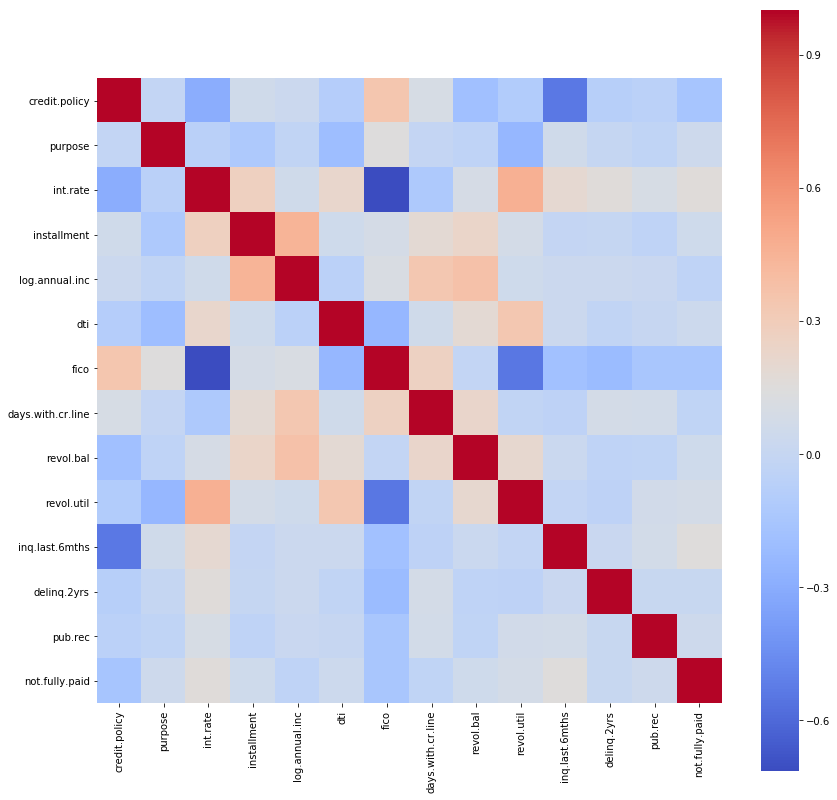

In [33]:
corr = loan.corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

In [34]:
prediction_var = loan.columns
prediction_var = prediction_var.drop("not.fully.paid")
prediction_var = prediction_var.drop("fico")
print(prediction_var)

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec'],
      dtype='object')


In [35]:
#now split our data into train and test
train, test = train_test_split(loan, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(6704, 14)
(2874, 14)


In [36]:
train_X = train[prediction_var]# taking the training data input
train_y=train['not.fully.paid']# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test['not.fully.paid']   #output value of test dat

In [37]:
logistic = LogisticRegression()
logistic.fit(train_X,train_y)
temp=logistic.predict(test_X)
print(metrics.accuracy_score(temp,test_y)) # to check the accuracy

0.8343771746694503
